In [1]:
########################################################################
# import default python-library
########################################################################
import pickle
import os
import sys
import glob
########################################################################


########################################################################
# import additional python-library
########################################################################
import numpy as np
import librosa
import librosa.core
import librosa.display
import librosa.feature
import yaml
import logging
# from import
from tqdm import tqdm
from sklearn import metrics
from keras.models import Model
from keras.layers import Input, Dense
########################################################################

In [2]:
# 현재 스크립트 실행 경로 출력
print(os.getcwd())
# c:\workspace\autoencoder\02_autoencoder

c:\workspace\autoencoder\02_autoencoder


In [3]:
# 스크립트 실행 경로 변경
# c:\workspace\autoencoder\02_autoencoder 으로 변경
os.chdir('c:/workspace/autoencoder/02_autoencoder')

In [4]:
# 현재 스크립트 실행 경로 출력
print(os.getcwd())

c:\workspace\autoencoder\02_autoencoder


In [5]:
########################################################################

# wav file Input
def file_load(wav_name, mono=False):
    """
    load .wav file.

    wav_name : str
        target .wav file
    sampling_rate : int
        audio file sampling_rate
    mono : boolean
        When load a multi channels file and this param True, the returned data will be merged for mono data

    return : numpy.array( float )
    """
    try:
        return librosa.load(wav_name, sr=None, mono=mono)
    except:
        logger.error("file_broken or not exists!! : {}".format(wav_name))


def demux_wav(wav_name, channel=0):
    """
    demux .wav file.

    wav_name : str
        target .wav file
    channel : int
        target channel number

    return : numpy.array( float )
        demuxed mono data

    Enabled to read multiple sampling rates.

    Enabled even one channel.
    """
    try:
        multi_channel_data, sr = file_load(wav_name)
        if multi_channel_data.ndim <= 1:
            return sr, multi_channel_data

        return sr, np.array(multi_channel_data)[channel, :]

    except ValueError as msg:
        logger.warning(f'{msg}')


########################################################################

In [6]:
import matplotlib.pyplot as plt

# spectrograms 변환 함수 만들기
# 참고: https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html
def make_iamge(SOURCE,
               TARGET,
               n_mels=128,
               frames=5,
               n_fft=1024,
               hop_length=512,
               power=2.0):

    # 01 calculate the number of dimensions
    dims = n_mels * frames

    # 02 generate melspectrogram using librosa (**kwargs == param["librosa"])
    sr, y = demux_wav(SOURCE)

    # file = SOURCE
    # y, sr = librosa.load(file) # (default  sr=22050)
    # Return
      # y: np.ndarray [shape=(n,) or (…, n)] / audio time series. Multi-channel is supported.
      # sr: number > 0 [scalar / sampling rate of
    # S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spectrogram = librosa.feature.melspectrogram(y=y,
                                                     sr=sr,
                                                     n_fft=n_fft,
                                                     hop_length=hop_length,
                                                     n_mels=n_mels,
                                                     power=power)

    # Returns
      # S: np.ndarray [shape=(…, n_mels, t)] / Mel spectrogram
    S_dB = librosa.power_to_db(mel_spectrogram, ref=np.max)
    if TARGET == '':
      plt.figure(figsize=(12, 4))
      librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
      plt.title('mel power spectrogram')
      plt.colorbar(format='%+02.0f dB')
      plt.tight_layout()
      plt.show()
    else:
      fig = plt.figure(figsize=(15, 15))
      plt.axis('off')
      librosa.display.specshow(S_dB, sr=sr)
      plt.savefig(TARGET, bbox_inches='tight', pad_inches=0)
      plt.close(fig)  

In [7]:
import matplotlib.pyplot as plt

# spectrograms 변환 함수 만들기
# 참고: https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html
def make_iamge2(SOURCE, TARGET, FIG_SIZE):

    # 01 calculate the number of dimensions
    #dims = n_mels * frames

    # 02 generate melspectrogram using librosa (**kwargs == param["librosa"])
    sr, y = demux_wav(SOURCE)

    # STFT -> spectrogram
    hop_length = 512  # in num. of samples
    n_fft = 2048  # window in num. of samples

    # perform stft
    stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

    # calculate abs values on complex numbers to get magnitude
    spectrogram = np.abs(stft)  # np.abs(stft) ** 2

    # apply logarithm to cast amplitude to Decibels
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    if TARGET == '':
      plt.figure(figsize=(12, 4))
      librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel')
      plt.title('mel power spectrogram')
      plt.colorbar(format='%+02.0f dB')
      plt.tight_layout()
      plt.show()
    else:
      fig = plt.figure(figsize=FIG_SIZE)
      plt.axis('off')
      librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
      plt.savefig(TARGET, bbox_inches='tight', pad_inches=0)
      plt.close(fig)  

In [8]:
# https://wfdb.readthedocs.io/en/latest/
# The native Python waveform-database (WFDB) package
# A library of tools for reading, writing, and processing WFDB signals and annotations.
import wfdb

In [9]:
# import PIL
# import PIL.Image
# import tensorflow as tf
# import tensorflow_datasets as tfds

# 이미지 로드 및 전처리
# 참고: https://www.tensorflow.org/tutorials/load_data/images?hl=ko
#       Tensorflow공식 튜토리얼: 이미지 로드 및 전처리하기 
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
# import tensorflow_datasets as tfds

In [10]:
print(tf.__version__)

2.8.0


In [11]:
# 데이터세트 형식으로 만들기
import pathlib

# data_dir = pathlib.Path('./content/data/out')
data_dir = pathlib.Path('./dataset/36_57_out')
print(type(data_dir))
print(data_dir)

<class 'pathlib.WindowsPath'>
dataset\36_57_out


In [12]:
# image count
# image_count = len(list(data_dir.glob('*/*.jpg')))
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

89


In [13]:
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pathlib
import librosa
import librosa.display
import concurrent.futures

In [14]:
'''
2. Load training images  
'''
# resize and normalize data for training


def create_training_data(data_path, size=224):
    training_data = []
    # for category in CATEGORIES:  # "baseline" and "rattle"

    #     path = os.path.join(data_path, category)  # create path
    #     # get the classification  (0 or a 1). 0=baseline 1=rattle
    #     class_index = CATEGORIES.index(category)

    # iterate over each image
    for image in os.listdir(data_path):
        # check file extention
        if image.endswith(".jpg"):
            try:
                data_path = pathlib.Path(data_path)
                full_name = str(pathlib.Path.joinpath(data_path, image))
                data = cv2.imread(str(full_name), 0)
                # resize to make sure data consistency
                resized_data = cv2.resize(data, (size, size))
                # add this to our training_data
                training_data.append([resized_data])
            except Exception as err:
                print("an error has occured: ", err, str(full_name))

    # normalize data
    training_data = np.array(training_data)/255.
    # reshape
    training_data = np.array(training_data).reshape(-1, size, size)
    return training_data

In [15]:
'''
3. Build autoencoder 
'''
# Define a convolutional Autoencoder


class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        # input layer
        self.latent_dim = latent_dim
        # 1st dense layer
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),

        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(128, activation='relu'),
            layers.Dense(224*224, activation='sigmoid'),
            layers.Reshape((224, 224))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [16]:
'''
4. Set threshold
'''


def model_threshold(autoencoder, x_train):
    encoded_imgs = autoencoder.encoder(x_train).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
    loss = tf.keras.losses.mse(decoded_imgs, x_train)
    mean = np.mean(loss)
    std = np.std(loss)
    threshold = np.mean(loss) + np.std(loss)
    return loss, mean, std, threshold

In [17]:
'''
5. Make an inference
'''


def spectrogram_loss(autoencoder, spectrogram, size=224):
    data = np.ndarray(shape=(1, size, size), dtype=np.float32)
    # individual sample
    # Load an image from a file
    data = cv2.imread(str(spectrogram), 0)
    # resize to make sure data consistency
    resized_data = cv2.resize(data, (size, size))
    # nomalize img
    normalized_data = resized_data.astype('float32') / 255.
    # test an image
    encoded = autoencoder.encoder(normalized_data.reshape(-1, size, size))
    decoded = autoencoder.decoder(encoded)
    loss = tf.keras.losses.mse(decoded, normalized_data)
    sample_loss = np.mean(loss) + np.std(loss)
    return sample_loss

In [18]:
'''
2. Load training images
'''
data_path = "./dataset/36_57_out/normal"
x_train = create_training_data(data_path)

data_path = "./dataset/36_57_out/normal_test"
x_test = create_training_data(data_path)

In [19]:
# '''
# K-fold validation
# '''
# X = x_train
# y = x_train

# k = 4
# num_val_samples = len(X) // k

# num_epochs = 100
# all_scores = []

# for i in range(k):
#     print(f"Processing fold #{i}")
#     val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
#     val_targets = y[i * num_val_samples: (i + 1) * num_val_samples]
#     # i = 0 ==> val_data = X[0:9], val_targets = y[0:9]        
#     # i = 1 ==> val_data = X[9:18], val_targets = y[9:18]     
#     # i = 2 ==> val_data = X[18:27], val_targets = y[18:27]     
#     # i = 3 ==> val_data = X[27:36], val_targets = y[27:36]
#     partial_train_data = np.concatenate(
#         [X[:i * num_val_samples],
#             X[(i + 1) * num_val_samples:]],
#         axis=0)
#     partial_train_targets = np.concatenate(
#         [y[:i * num_val_samples],
#             y[(i + 1) * num_val_samples:]],
#         axis=0)
#     # i = 0 ==> partial_training_data = [X[:0],X[9:]], partial_train_targets = [y[:0],y[9:]]
#     # i = 1 ==> partial_training_data = [X[:9],X[18:]], partial_train_targets = [y[:9],y[18:]]
#     # i = 2 ==> partial_training_data = [X[:18],X[27:]], partial_train_targets = [y[:18],y[27:]]
#     # i = 3 ==> partial_training_data = [X[:27],X[36:]], partial_train_targets = [y[:27],y[36:]]
#     autoencoder = Autoencoder(latent_dim=64 * 4)
#     autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(), metrics=["mae"])
#     hist = autoencoder.fit(partial_train_data, partial_train_targets,
#                             validation_data=(val_data, val_targets),
#                             epochs=num_epochs, batch_size=16, verbose=0)
#     val_mse, val_mae = autoencoder.evaluate(
#         val_data, val_targets, verbose=0)
#     all_scores.append(val_mae)


In [20]:
# # Evaluate all_scores
# all_scores

In [21]:
# np.mean(all_scores)

Processing fold #0
loss average:  0.001909296552005016
Standard deviation:  0.0022806134969808748


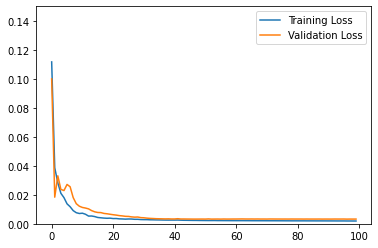

Processing fold #1
loss average:  0.0018059069060374876
Standard deviation:  0.0020073758186196487


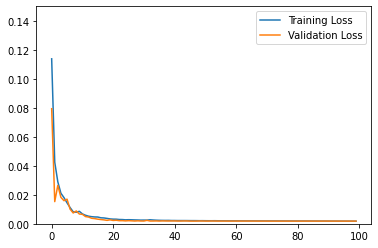

Processing fold #2
loss average:  0.0015008759935516665
Standard deviation:  0.0014558352705382818


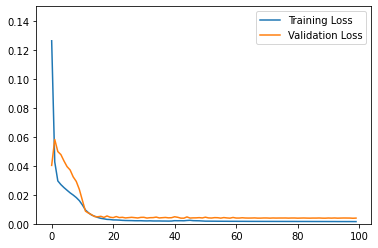

Processing fold #3
loss average:  0.001572753613075709
Standard deviation:  0.0013977469160633635


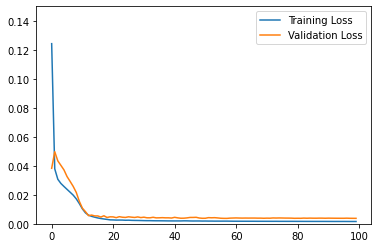

In [22]:
'''
K-fold validation
'''
X = x_train
y = x_train

k = 4
num_val_samples = len(X) // k

num_epochs = 100
all_scores = []

all_k_loss = []
all_k_std = []
all_mse_histories = []
all_val_mse_histories = []
all_mae_histories = []
all_std_histories =[]
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = X[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [X[:i * num_val_samples],
            X[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y[:i * num_val_samples],
            y[(i + 1) * num_val_samples:]],
        axis=0)
    autoencoder = Autoencoder(latent_dim=64 * 4)
    autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
    history = autoencoder.fit(partial_train_data, partial_train_data,
						#shuffle=True,
                        validation_data=(val_data, val_data),
                        epochs=num_epochs, batch_size=16, verbose=0)
    #mae_history = history.history["val_mae"]
    #all_mae_histories.append(mae_history)
    # Fold별 그래프 표시하기 위해 추가함
    # plt.plot(range(1, len(mae_history) + 1), mae_history)
    # plt.xlabel("Epochs")
    # plt.ylabel("Validation MAE")
    # #plt.ylim([0, 0.30])
    # plt.show()

    
    k_loss, k_mean, k_std, k_threshold = model_threshold(autoencoder, partial_train_data)    
    all_k_loss.append(k_loss)
    print("loss average: ", k_mean)
    
    all_k_std.append(k_std)
    print("Standard deviation: ", k_std)

    mse_history = history.history["loss"]
    all_mse_histories.append(mse_history)
    # print("loss average: ", np.mean(mse_history))

    all_std_histories.append(np.std(mse_history))
    # print("Standard deviation: ", np.std(mse_history))

    val_mse_history = history.history["val_loss"]
    all_val_mse_histories.append(val_mse_history)
    # print("val_loss average: ", np.mean(val_mse_history))

    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()
    plt.ylim([0, 0.150])
    plt.show()


In [23]:
#생성된 모델을 이용해 training data의 재구성 오류의 평균 및 std
print("all loss average: ", np.mean(all_k_loss))
print("all Standard deviation average: ", np.mean(all_k_std))
print("threshold average: ", np.mean(all_k_loss)+ np.mean(all_k_std))


all loss average:  0.00169720826616747
all Standard deviation average:  0.0017853928755505422
threshold average:  0.0034826011417180124


In [24]:
# Building the history of successive mean K-fold validation scores
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]
average_val_mse_history = [
    np.mean([x[i] for x in all_val_mse_histories]) for i in range(num_epochs)]    

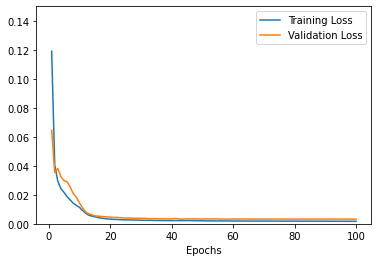

In [25]:
# Plotting validation scores
plt.plot(range(1, len(average_mse_history) + 1), average_mse_history, label="Training Loss")
plt.plot(range(1, len(average_val_mse_history) + 1), average_val_mse_history, label="Validation Loss")
plt.xlabel("Epochs")
plt.legend()
plt.ylim([0, 0.15])
plt.show()